In [31]:
import xarray as xr
import os
import numpy as np


from mitgcm_python_master.utils import mask_2d_to_3d, apply_mask
from mitgcm_python_master.grid import ERA5Grid, PACEGrid, Grid, dA_from_latlon, pierre_obs_grid
from mitgcm_python_master.calculus import vertical_average



data_xr=xr.open_dataset('/data/oceans_output/shelf/kaight/mitgcm/PAS_PACE01/output/194001/MITgcm/output.nc')
z=data_xr.Z

data=data_xr['THETA'].to_numpy()

gp='/data/oceans_output/shelf/kaight/mitgcm/PAS_grid/'
grid = Grid(gp)

z0=[-700, -200]
mask = np.ones([grid.ny, grid.nx]).astype(bool)
mask = mask_2d_to_3d(mask, grid, zmin=z0[0], zmax=z0[1])
data_tmp = apply_mask(data, np.invert(mask), time_dependent=True)
data_new=vertical_average (data_tmp, grid, gtype='t', time_dependent=True)

In [ ]:
def readMITgcmData_depth_averaged(var, bd='/data/oceans_output/shelf/kaight/mitgcm', members='all', z0=[-700, -200], save=False):
    '''
    var: name of variable (string).
    bd: base directory, with PAS_PACE folders.
    members: members to read ('all' or list with boundaries (e.g. [0, 1] for member 1)).
    '''
    
    from mitgcm_python_master.utils import mask_2d_to_3d, apply_mask
    from mitgcm_python_master.grid import ERA5Grid, PACEGrid, Grid, dA_from_latlon, pierre_obs_grid
    from mitgcm_python_master.calculus import vertical_average
    
    gp='/data/oceans_output/shelf/kaight/mitgcm/PAS_grid/'
    grid = Grid(gp)
    mask = np.ones([grid.ny, grid.nx]).astype(bool)
    mask = mask_2d_to_3d(mask, grid, zmin=z0[0], zmax=z0[1])
    
    #Creating list with files to read.
    if members=='all':
        pdir=[os.path.join(bd, f) for f in os.listdir(bd) if ('PAS_PACE' in f) & ('hb' not in f)]
        number=20
    else:
        pdir=[os.path.join(bd, f) for f in os.listdir(bd) if ('PAS_PACE' in f) & ('hb' not in f)][members[0]:members[-1]]
        number=members[-1]-members[0]
        
    files=[os.path.join('output', f, 'MITgcm/output.nc') for f in os.listdir('/data/oceans_output/shelf/kaight/mitgcm/PAS_PACE01/output') if (f[0]==str(1)) | (f[0]==str(2))]
    
    #Reading the actual data.
    data=None

    for i, p in enumerate(pdir):
        print(i)
        print(p)
        fd=[os.path.join(p, f) for f in files]
        fd.sort()
        b=xr.open_dataset(fd[0])
        b=b[[var]]
        if var=='THETA':
            data=b.to_numpy()
            data = apply_mask(data, np.invert(mask), time_dependent=True)
            data=vertical_average (data, grid, gtype='t', time_dependent=True)
            b = xr.DataArray(data, dims=('time', "YC", "XC"), coords={'time': b.time, "YC": b.YC, "XC": b.XC})
            #b=b.sel(Z=slice(-200, -700)).mean(dim='Z')

        for f in fd[1:]:
            a=xr.open_dataset(f)
            a=a[[var]]
            if var=='THETA':
                data=a.to_numpy()
                data = apply_mask(data, np.invert(mask), time_dependent=True)
                data=vertical_average (data, grid, gtype='t', time_dependent=True)
                a = xr.DataArray(data, dims=('time', "YC", "XC"), coords={'time': a.time, "YC": a.YC, "XC": a.XC})
                #a=a.sel(Z=slice(-200, -700)).mean(dim='Z')
            b=xr.concat([b,a], dim='time')
        if save==True:
            b.to_netcdf('./data/new_amundsen_shelf_temp_200to700_ens'+str(i+1)+'.nc')
        if i==0:
            data=b
        else:
            data=xr.concat([data,b], dim='ens')
    if save==True:
#    for i in range(len(data.ens)):
#        
    #Making sure that the dataset has the dimension 'ens'
    if number==1:
        data=data.expand_dims("ens")
            
    return data

In [6]:
mask[:,150,150]

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [7]:
data=xr.open_dataset('/data/oceans_output/shelf/kaight/mitgcm/PAS_PACE01/output/194001/MITgcm/output.nc')


In [10]:
np.shape(data['THETA'].to_numpy())

(12, 50, 384, 600)

In [16]:
data_tmp[3,:,150,150]

masked_array(data=[--, --, --, --, --, --, --, --, --, --, --,
                   -0.24864345788955688, 0.5235344171524048,
                   1.1590611934661865, 1.4687923192977905,
                   1.5371346473693848, 1.5350046157836914,
                   1.5166655778884888, 1.4901727437973022,
                   1.4590884447097778, 1.4249390363693237, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True, False, False, False, False, False,
                   False, False, False, False, False,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True],
 

In [18]:
data[3,:,150,150]

array([-0.46239442, -0.46218407, -0.46266612, -0.42620414, -0.5010461 ,
       -1.0348727 , -1.566638  , -1.7456526 , -1.7360519 , -1.540758  ,
       -1.0022984 , -0.24864346,  0.5235344 ,  1.1590612 ,  1.4687923 ,
        1.5371346 ,  1.5350046 ,  1.5166656 ,  1.4901727 ,  1.4590884 ,
        1.424939  ,  1.3891426 ,  1.3530401 ,  1.3163513 ,  1.2799687 ,
        1.2437391 ,  1.207439  ,  1.1713849 ,  1.1355835 ,  1.0983262 ,
        1.057028  ,  1.0102782 ,  0.9580749 ,  0.89874774,  0.8325326 ,
        0.7572777 ,  0.67477775,  0.5863623 ,  0.49343517,  0.39695126,
        0.30221286,  0.24186346,  0.20867679,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
      dtype=float32)

In [19]:
z

<xarray.DataArray 'Z' (Z: 50)>
array([-5.0000e+00, -1.5000e+01, -2.5000e+01, -3.5000e+01, -4.6000e+01,
       -5.9250e+01, -7.5250e+01, -9.4500e+01, -1.1750e+02, -1.4500e+02,
       -1.7750e+02, -2.1500e+02, -2.5750e+02, -3.0500e+02, -3.5500e+02,
       -4.0500e+02, -4.5500e+02, -5.0500e+02, -5.5500e+02, -6.0500e+02,
       -6.5500e+02, -7.0500e+02, -7.5500e+02, -8.0500e+02, -8.5500e+02,
       -9.0500e+02, -9.5500e+02, -1.0050e+03, -1.0550e+03, -1.1100e+03,
       -1.1750e+03, -1.2500e+03, -1.3350e+03, -1.4325e+03, -1.5475e+03,
       -1.6850e+03, -1.8475e+03, -2.0350e+03, -2.2475e+03, -2.4850e+03,
       -2.7600e+03, -3.0600e+03, -3.3600e+03, -3.6600e+03, -3.9600e+03,
       -4.2600e+03, -4.5600e+03, -4.8600e+03, -5.1600e+03, -5.4600e+03],
      dtype=float32)
Coordinates:
  * Z        (Z) float32 -5.0 -15.0 -25.0 ... -4.86e+03 -5.16e+03 -5.46e+03
    PHrefC   (Z) float32 ...
    drF      (Z) float32 ...
Attributes:
    units:          m
    positive:       down
    standard_name:  depth
    long_name:      vertical coordinate of cell center
    axis:           Z

In [21]:
np.shape(data_new)

(12, 384, 600)

In [24]:
data_xr

<xarray.Dataset>
Dimensions:   (time: 12, YC: 384, XC: 600, XG: 600, YG: 384, Z: 50, Zl: 50, Zu: 50, Zp1: 51)
Coordinates: (12/26)
    iter      (time) int64 ...
  * time      (time) object 1940-02-01 00:00:00 ... 1941-01-01 00:00:00
  * XC        (XC) float32 220.1 220.1 220.2 220.4 ... 279.6 279.8 279.9 280.0
  * YC        (YC) float32 -75.64 -75.61 -75.59 -75.56 ... -62.48 -62.44 -62.39
  * XG        (XG) float32 220.0 220.1 220.2 220.3 ... 279.6 279.7 279.8 279.9
  * YG        (YG) float32 -75.65 -75.63 -75.6 -75.58 ... -62.51 -62.46 -62.41
    ...        ...
    drC       (Zp1) float32 ...
    PHrefF    (Zp1) float32 ...
    drF       (Z) float32 10.0 10.0 10.0 10.0 12.0 ... 300.0 300.0 300.0 300.0
    hFacS     (Z, YG, XC) float32 ...
    hFacC     (Z, YC, XC) float32 ...
    hFacW     (Z, YC, XG) float32 ...
Data variables: (12/33)
    EXFswdn   (time, YC, XC) float32 ...
    EXFuwind  (time, YC, XC) float32 ...
    EXFvwind  (time, YC, XC) float32 ...
    EXFlwdn   (time, YC, XC) float32 ...
    EXFpress  (time, YC, XC) float32 ...
    EXFatemp  (time, YC, XC) float32 ...
    ...        ...
    THETA     (time, Z, YC, XC) float32 -1.287 0.0 0.0 ... -0.008644 -0.008644
    DFrI_TH   (time, Zl, YC, XC) float32 ...
    KPPg_TH   (time, Zl, YC, XC) float32 ...
    ADVy_TH   (time, Z, YG, XC) float32 ...
    ADVr_TH   (time, Zl, YC, XC) float32 ...
    ADVx_TH   (time, Z, YC, XG) float32 ...

In [32]:
hoi = xr.DataArray(data_new, dims=('time', "YC", "XC"), coords={'time': data_xr.time, "YC": data_xr.YC, "XC": data_xr.XC})
hoi



<xarray.DataArray (time: 12, YC: 384, XC: 600)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [1.56527806, 1.46811511, 1.46341959, ..., 1.83009702,
         1.87751236, 2.04245829],
        [1.56472005, 1.44480572, 1.43909282, ..., 1.88574703,
         1.91995975, 2.04887675],
        [1.56391717, 1.55657881, 1.56509211, ..., 2.04177179,
         2.04283884, 2.05510961]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [1.55527949, 1.52943976, 1.51540686, ..., 2.21301895,
         2.22176477, 2.22859533],
        [1.55732501, 1.52443934, 1.51371022, ..., 2.21693256,
         2.21840891, 2.24009134],
        [1.55915519, 1.55009924, 1.55462883, ..., 2.22819574,
         2.22967537, 2.25101799]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [1.55988162, 1.50576914, 1.5030552 , ..., 2.12335994,
         2.12660107, 2.11496707],
        [1.56028677, 1.49049772, 1.48633578, ..., 2.11022376,
         2.10949621, 2.1269064 ],
        [1.56061388, 1.55524833, 1.55968736, ..., 2.11436144,
         2.11580842, 2.13811452]]])
Coordinates:
  * time     (time) object 1940-02-01 00:00:00 ... 1941-01-01 00:00:00
  * YC       (YC) float32 -75.64 -75.61 -75.59 -75.56 ... -62.48 -62.44 -62.39
  * XC       (XC) float32 220.1 220.1 220.2 220.4 ... 279.6 279.8 279.9 280.0

In [33]:
hoi

<xarray.Dataset>
Dimensions:  (time: 12, YC: 384, XC: 600)
Coordinates:
  * time     (time) object 1940-02-01 00:00:00 ... 1941-01-01 00:00:00
  * YC       (YC) float32 -75.64 -75.61 -75.59 -75.56 ... -62.48 -62.44 -62.39
  * XC       (XC) float32 220.1 220.1 220.2 220.4 ... 279.6 279.8 279.9 280.0
Data variables:
    THETA    (time, YC, XC) float64 nan nan nan nan ... 2.114 2.114 2.116 2.138

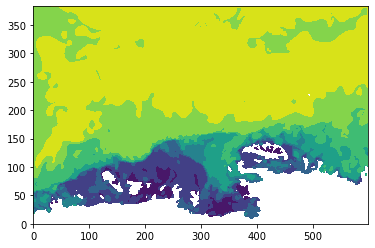

In [28]:
plt.contourf(hoi.values[0,:,:])

In [27]:
import matplotlib.pyplot as plt

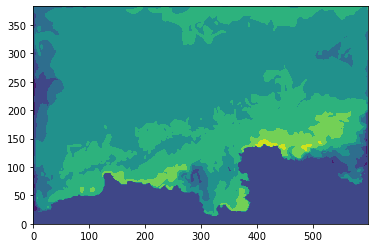

In [30]:
plt.contourf(data_xr.THETA.values[0,0,:,:])

In [1]:
import xarray as xr
import numpy as np

In [28]:
r=xr.open_dataset('./data/new2_amundsen_shelf_temp_200to700_ens1.nc')
k=xr.open_dataset('./data/amundsen_shelf_temp_200to700_ens1.nc')

In [8]:
np.shape(r.THETA)

(1488, 384, 600)

In [11]:
o=xr.concat([r,k], dim='ens')

In [15]:
np.shape(o.THETA)

(2, 1488, 384, 600)

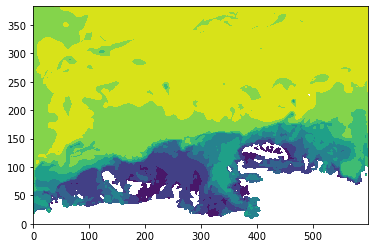

In [15]:
import matplotlib.pyplot as plt
plt.contourf(r.THETA.values[500,:,:])

In [17]:
r.THETA.values

array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [1.56527806, 1.42877997, 1.42157543, ..., 2.08526145,
         2.07692387, 2.04245829],
        [1.56472005, 1.4065944 , 1.39895208, ..., 2.05165953,
         2.03226045, 2.04887675],
        [1.56391717, 1.55657881, 1.56509211, ..., 2.04177179,
         2.04283884, 2.05510961]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [1.59509484, 1.51710036, 1.50113713, ..., 2.14274713,
         2.14923096, 2.13850379],
        [1.5

In [22]:
from sys import getsizeof
getsizeof(r.THETA.values[:,:,:])

136

In [26]:
r.THETA.size

342835200

In [27]:
k.THETA.size

342835200